## Insurance Claims- Fraud Detection

Problem Statement:

Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

#### let's import important libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")   #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.simplefilter(action='ignore')

In [2]:
df=pd.read_csv('insuranceclaimfrauddetectiondataset.csv')

In [3]:
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [5]:
df.shape

(1000, 40)

There is total 1000 rows and 40 columns in the dataset.

In [6]:
# let's check concise summary of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
# check null value in the dataset.
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Observation:
    
    There is no use of column _c39 so, let's drop this column.

In [8]:
df.drop('_c39',axis=1,inplace=True)

In [9]:
# let's check descriptive summary of the dataset.
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


## EDA

In [10]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [11]:
#there are '?' in the datset which we have to remove by NaN Values
df = df.replace('?',np.NaN)

df.isnull().any()

months_as_customer             False
age                            False
policy_number                  False
policy_bind_date               False
policy_state                   False
policy_csl                     False
policy_deductable              False
policy_annual_premium          False
umbrella_limit                 False
insured_zip                    False
insured_sex                    False
insured_education_level        False
insured_occupation             False
insured_hobbies                False
insured_relationship           False
capital-gains                  False
capital-loss                   False
incident_date                  False
incident_type                  False
collision_type                  True
incident_severity              False
authorities_contacted          False
incident_state                 False
incident_city                  False
incident_location              False
incident_hour_of_the_day       False
number_of_vehicles_involved    False
p

In [12]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,NaN,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,NaN,0,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,NaN,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,NaN,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [13]:
#missing value treatment using fillna

# we will replace the '?' by the most common collision type as we are unaware of the type.
df['collision_type'].fillna(df['collision_type'].mode()[0], inplace = True)

# It may be the case that there are no responses for property damage then we might take it as No property damage.
df['property_damage'].fillna('NO', inplace = True)

# again, if there are no responses fpr police report available then we might take it as No report available
df['police_report_available'].fillna('NO', inplace = True)

In [14]:
## Verify if the dataframe have no more missing values
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

N    753
Y    247
Name: fraud_reported, dtype: int64


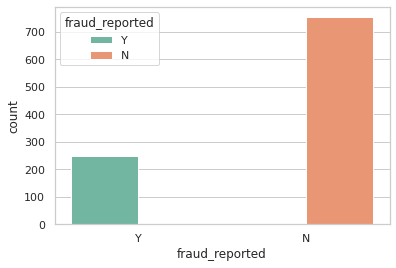

In [15]:
print(df['fraud_reported'].value_counts())
sns.countplot(x='fraud_reported', data=df, palette='Set2',hue = 'fraud_reported')
plt.show()

In [16]:
# percentage of non fraud claim in train dataset
print('percentage of non fraud claim in train dataset is %.2f%%' %(((df['fraud_reported'] == 'N').sum()/df.shape[0])*100))
# percentage of fraud claim reported in train dataset
print('percentage of non fraud claim in train dataset is %.2f%%' %(((df['fraud_reported'] == 'Y').sum()/df.shape[0])*100))

percentage of non fraud claim in train dataset is 75.30%
percentage of non fraud claim in train dataset is 24.70%


In [17]:
#check the correlation
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


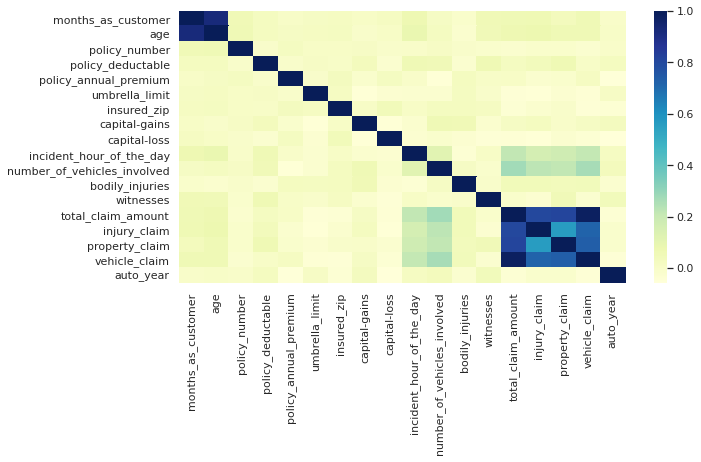

In [18]:
# plotting correlation heatmap
f, ax = plt.subplots(figsize=(10, 5))
dataplot=sns.heatmap(df.corr(),cmap="YlGnBu", annot=False)

Note: It looks like there are high correlation "months as customer" and customer "age" and Probably because drivers buy auto insurance when they own a car and this time measure only increases with age.Apart from that, there don’t seem to be many correlations in the data. There don’t seem to be multicollinearity problems except maybe that all the claims are all correlated, and somehow total claims have accounted for them.

In [19]:
# lets check the covriance
df.cov()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.325104e+04,970.201810,1.703130e+06,1.888144e+03,1.410315e+02,4.098745e+06,1.476998e+05,2.053193e+04,6.537987e+04,56.525149,1.728322,-0.959327,7.468871,1.887564e+05,3.670575e+04,1.940521e+04,1.326454e+05,-0.202464
age,9.702018e+02,83.544841,1.395997e+05,1.632352e+02,3.214568e+01,3.806326e+05,1.678029e+04,-1.802445e+03,1.892620e+03,5.538026,0.205834,-0.117534,0.531856,1.685908e+04,3.369297e+03,2.685543e+03,1.080424e+04,0.074430
policy_number,1.703130e+06,139599.665361,6.608139e+10,-1.059731e+06,1.416366e+06,5.296036e+09,1.305565e+08,7.023384e+07,-4.095652e+07,201.322010,3518.009337,-961.035852,-3617.161738,-1.222275e+08,-1.099333e+07,-1.324355e+07,-9.799063e+07,-282.988733
policy_deductable,1.888144e+03,163.235235,-1.059731e+06,3.743784e+05,-4.848613e+02,1.527928e+07,1.993895e+05,6.005009e+05,-4.048617e+05,259.175175,31.927928,-11.423423,45.313313,3.689501e+05,1.167917e+05,1.912697e+05,6.088869e+04,96.088088
policy_annual_premium,1.410315e+02,32.145675,1.416366e+06,-4.848613e+02,5.961772e+04,-3.504155e+06,5.664307e+05,-9.349637e+04,1.615803e+05,-2.678940,-11.441581,5.362622,0.632688,5.862176e+04,-2.101409e+04,-1.372875e+04,9.336460e+04,-72.306760
umbrella_limit,4.098745e+06,380632.632633,5.296036e+09,1.527928e+07,-3.504155e+06,5.278077e+12,3.240420e+09,-3.026763e+09,-1.553189e+09,-371415.415415,-49788.788789,42850.850851,-17204.204204,-2.447073e+09,-5.092246e+08,-2.637003e+08,-1.674148e+09,136733.733734
insured_zip,1.476998e+05,16780.292669,1.305565e+08,1.993895e+05,5.664307e+05,3.240420e+09,5.141121e+09,1.259612e+07,9.948976e+07,4124.025754,2005.227796,1687.420324,1578.175520,-6.412337e+07,-6.122698e+06,-2.366451e+06,-5.563422e+07,-14120.443708
capital-gains,2.053193e+04,-1802.445245,7.023384e+07,6.005009e+05,-9.349637e+04,-3.026763e+09,1.259612e+07,7.768588e+08,-3.674132e+07,-3178.586987,1750.552653,1276.184985,-546.757457,1.175952e+07,3.528093e+06,-1.047625e+05,8.336193e+06,5264.676376
capital-loss,6.537987e+04,1892.620220,-4.095652e+07,-4.048617e+05,1.615803e+05,-1.553189e+09,9.948976e+07,-3.674132e+07,7.898403e+08,-4894.551752,-426.512212,-562.812412,-1290.858959,-2.675643e+07,-6.318256e+06,-3.100158e+06,-1.733802e+07,-9571.920821
incident_hour_of_the_day,5.652515e+01,5.538026,2.013220e+02,2.591752e+02,-2.678940e+00,-3.714154e+05,4.124026e+03,-3.178587e+03,-4.894552e+03,48.321586,0.855540,-0.197045,0.050422,3.995424e+04,5.624392e+03,6.021358e+03,2.830849e+04,0.893562




Difference between covarience and correlation Covariance signifies the direction of the linear relationship between the two variables. By direction we mean if the variables are directly proportional or inversely proportional to each other. (Increasing the value of one variable might have a positive or a negative impact on the value of the other variable)

Correlation Correlation analysis is a method of statistical evaluation used to study the strength of a relationship between two, numerically measured, continuous variables.


### Independent variable visualization

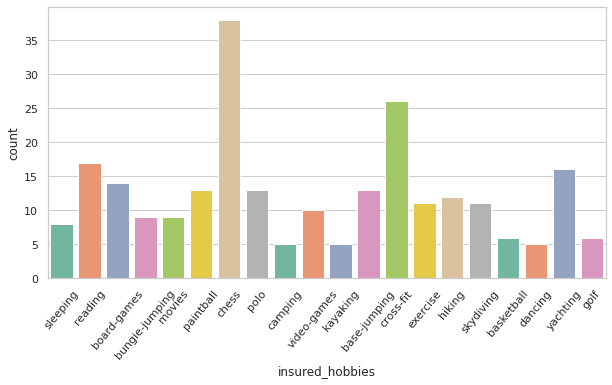

In [20]:
# Count plot for insured_hobbies
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='insured_hobbies', data=df[df.fraud_reported == 'Y'], palette='Set2')
plot.set_xticklabels(plot.get_xticklabels(), rotation=50)     # for readibility
plt.show()

Observation: It seems like chess players and crossfitters have higher tendencies to fraud.

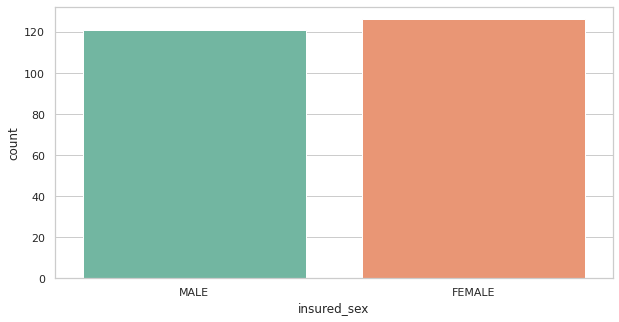

In [21]:
# count plot for insured_sex
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='insured_sex', data=df[df.fraud_reported == 'Y'], palette='Set2')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)     # for readibility
plt.show()

Observation:
    
    Male and Female have almost equal tendency of fraud

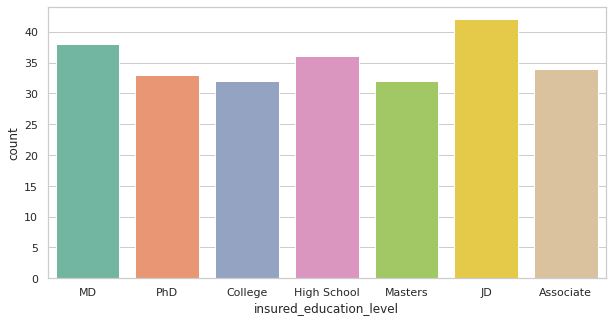

In [22]:
# count plot for insured_education_level
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='insured_education_level', data=df[df.fraud_reported == 'Y'], palette='Set2')
plot.set_xticklabels(plot.get_xticklabels(), rotation=0)     # for readibility
plt.show()

Observation : 
    
    insured customer having education level JD and High School have high tendency of fraud.

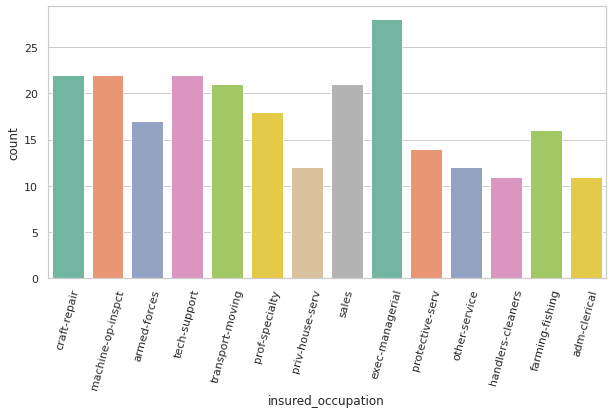

In [23]:
# count plot for insured occupation
f, ax = plt.subplots(figsize=(10, 5))
plot = sns.countplot(x='insured_occupation', data=df[df.fraud_reported == 'Y'], palette='Set2')
plot.set_xticklabels(plot.get_xticklabels(), rotation=75)     # for readibility
plt.show()

Observation : 
    
    Looks like people having exec-managerial occupation have very high tendency of fraud

In [24]:
#Damage Analysis
print(df['incident_severity'].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


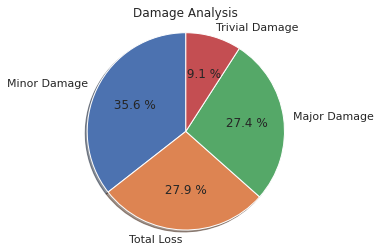

In [25]:
labels = 'Minor Damage', 'Total Loss', 'Major Damage', 'Trivial Damage'
sizes = [320, 251, 247, 82]
explode = (0, 0, 0, 0)
  
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode = explode,
        labels = labels, autopct ='% 1.1f %%',
        shadow = True, startangle = 90)
ax1.axis('equal')
  
ax1.set_title('Damage Analysis')
plt.show()

In [26]:
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [27]:
fraud=df[df['fraud_reported']=='Y']

In [28]:
fraud['policy_number'].value_counts()[:10]

261119    1
730819    1
414913    1
143038    1
621756    1
347984    1
500639    1
753844    1
431283    1
373935    1
Name: policy_number, dtype: int64

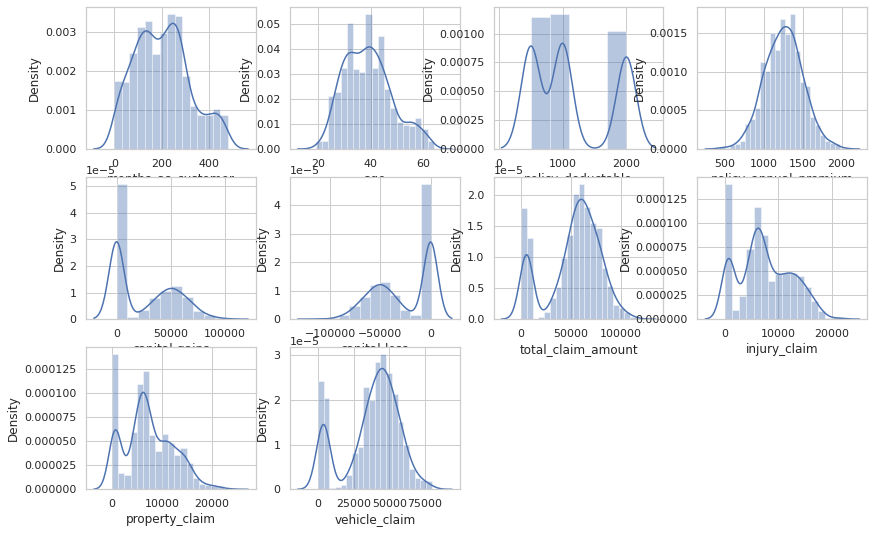

In [29]:
col=['months_as_customer','age','policy_deductable','policy_annual_premium','capital-gains', 'capital-loss','total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim']

plt.figure(figsize=(14,12))
k=1
for i in col:
    plt.subplot(4,4,k)
    sns.distplot(df[i])
    k=k+1
plt.show()

Observation:
    
    Almost all the data above are normally distributed.

In [30]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [31]:
a=df[df['umbrella_limit']>0]

<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

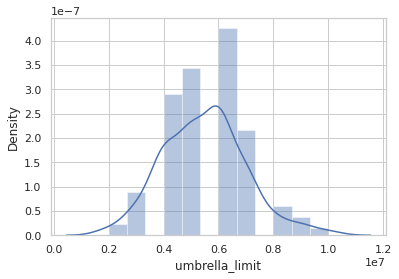

In [32]:
sns.distplot(a['umbrella_limit'])

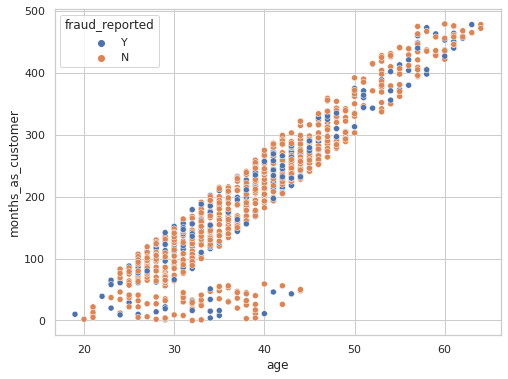

In [33]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='age',y='months_as_customer',hue='fraud_reported',data=df)
plt.grid(True)
plt.show()



There is no pattern that justifies if the customers are with the company for more years and are claiming the fraud claims.


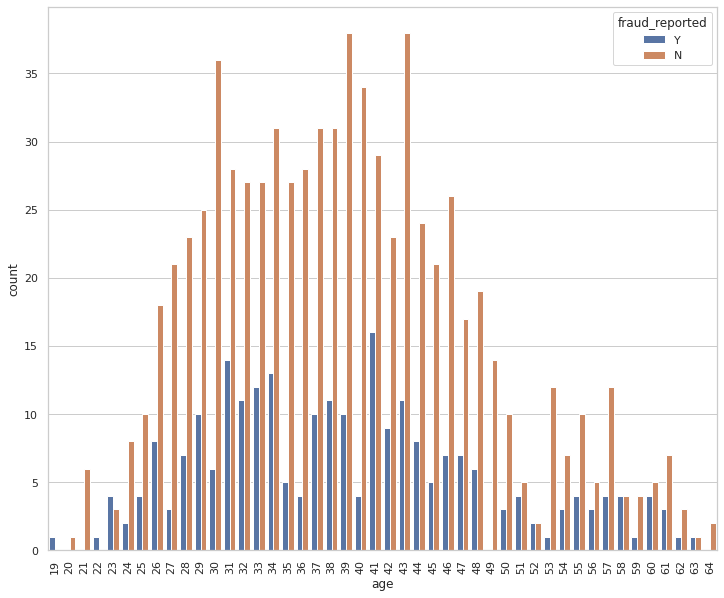

In [34]:
plt.figure(figsize=(12,10))
sns.countplot(x=df['age'],hue='fraud_reported',data=df)
plt.xticks(rotation=90)
plt.show()

In [35]:
a=df[df['fraud_reported']=='Y']
a[['policy_number','insured_occupation','insured_education_level','total_claim_amount']].sort_values('total_claim_amount',ascending=False)[:20]

,policy_number,insured_occupation,insured_education_level,total_claim_amount
149,217938,craft-repair,JD,112320
163,346940,prof-specialty,Masters,107900
479,753844,sales,MD,104610
145,515050,exec-managerial,Associate,99320
247,187775,other-service,JD,98670
91,127754,tech-support,Associate,98340
974,291006,transport-moving,JD,98280
23,115399,priv-house-serv,MD,98160
41,616337,transport-moving,Associate,97080
796,728025,machine-op-inspct,Masters,92730


There are 20 Policies that have frauds and are listed above and the Policy_Number ='217938' has claimed '$112320' amount.

In [36]:
a['insured_occupation'].value_counts()

exec-managerial      28
tech-support         22
machine-op-inspct    22
craft-repair         22
sales                21
transport-moving     21
prof-specialty       18
armed-forces         17
farming-fishing      16
protective-serv      14
other-service        12
priv-house-serv      12
handlers-cleaners    11
adm-clerical         11
Name: insured_occupation, dtype: int64

In [37]:
a['insured_education_level'].value_counts()

JD             42
MD             38
High School    36
Associate      34
PhD            33
College        32
Masters        32
Name: insured_education_level, dtype: int64

People whose education level is 'JD' and working as 'exec-manegerial' have more fraud claims.

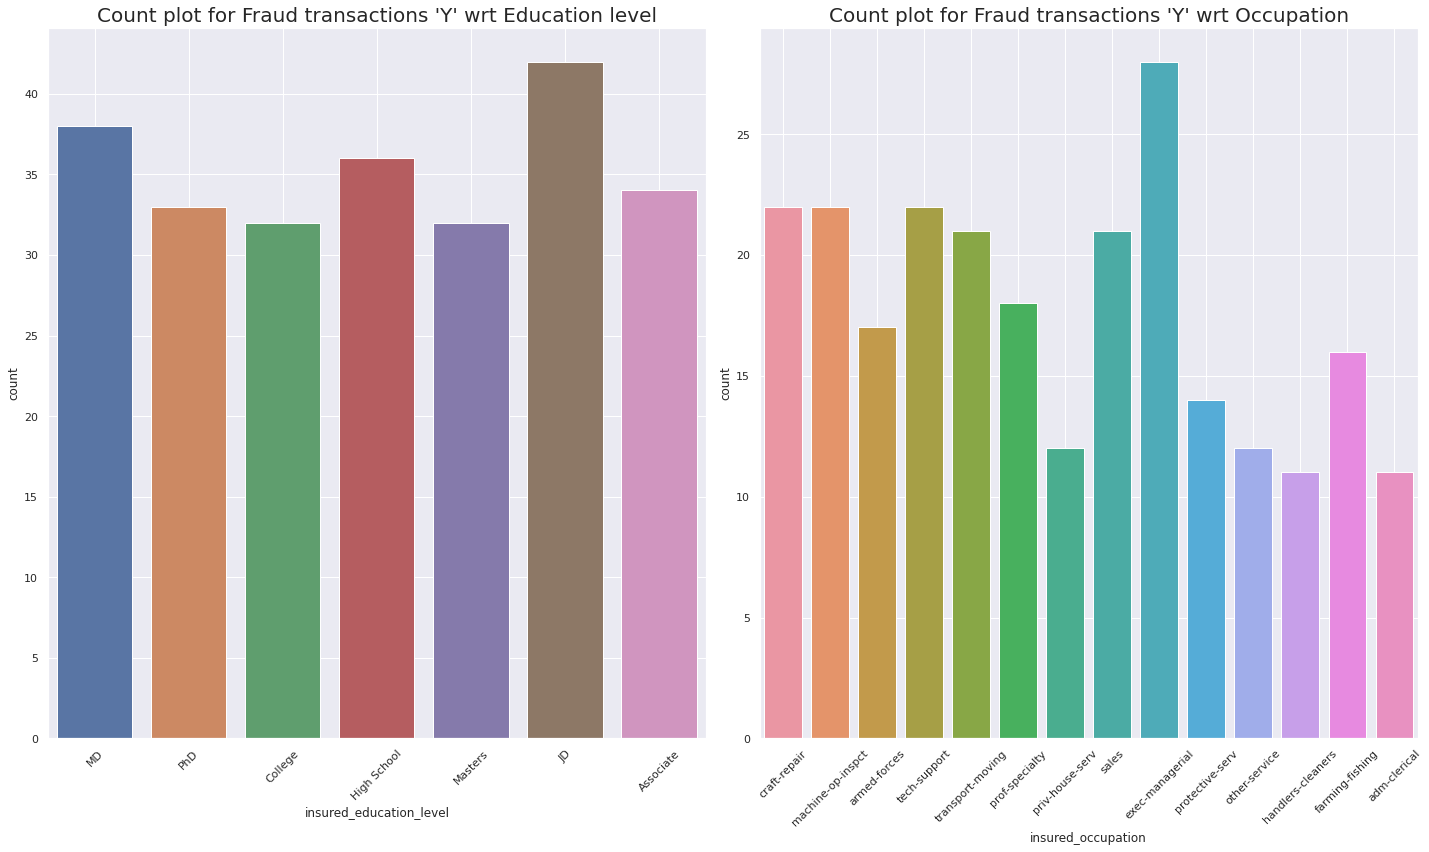

In [38]:
sns.set(style="darkgrid")

plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
plt.title("Count plot for Fraud transactions 'Y' wrt Education level",fontsize=20)
sns.countplot('insured_education_level',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Count plot for Fraud transactions 'Y' wrt Occupation",fontsize=20)
sns.countplot('insured_occupation',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



People with education level as 'JD' are much involved in fraud transactions. People with occupation as 'exec-managerial' are much involved in fraud transactions.

In [39]:
#Looking at below claim_amount:
a_claims=pd.pivot_table(a,values='total_claim_amount',index=['insured_occupation','insured_education_level']).sort_values('total_claim_amount',ascending=False)

cm=sns.light_palette("black", as_cmap=True)
a_claims.style.background_gradient(cmap=cm)



People from occupation sector as Protective-services and education level as JD have highest fraud claimed amount of 87,890$.


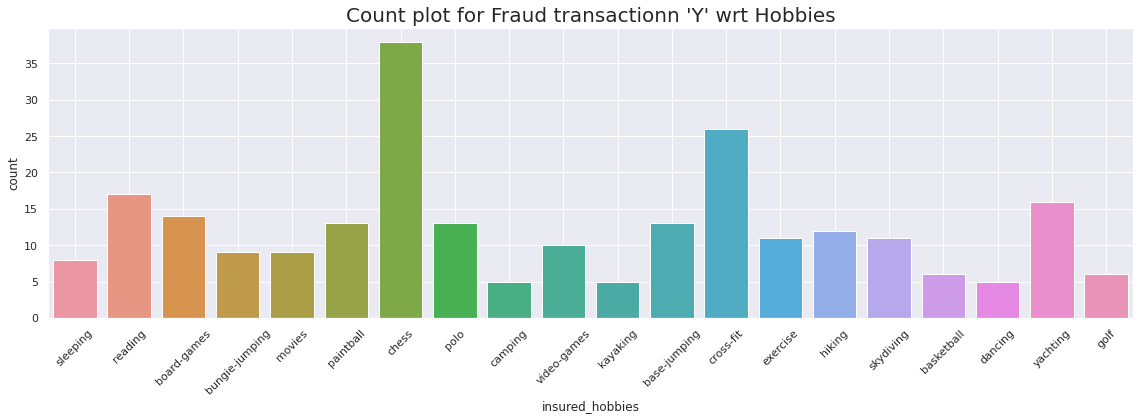

In [40]:
plt.figure(figsize=(16,6))
plt.title("Count plot for Fraud transactionn 'Y' wrt Hobbies",fontsize=20)
sns.countplot('insured_hobbies',data=a)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

People who have the hobbies of 'chess' and 'cross-fit' are tend to do the fraud claims.

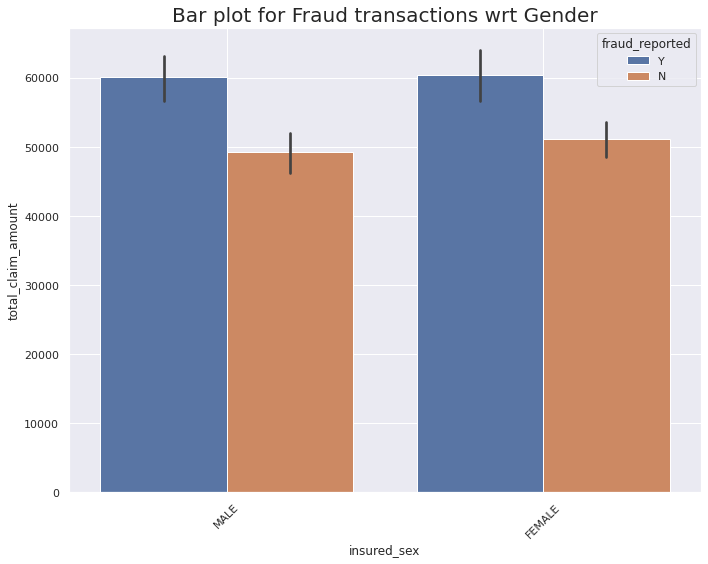

In [41]:
plt.figure(figsize=(10,8))
plt.title("Bar plot for Fraud transactions wrt Gender",fontsize=20)
sns.barplot(x='insured_sex',y='total_claim_amount',hue='fraud_reported',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()



Both Male and Female are tend to do the fraud claims similarly.


In [42]:
a['insured_relationship'].value_counts()

other-relative    52
not-in-family     45
wife              42
own-child         39
husband           35
unmarried         34
Name: insured_relationship, dtype: int64

In [43]:
profit=df['capital-gains']-df['capital-loss']
df1=df
df1['profit']=profit

In [44]:
df1.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [45]:
df[['policy_number','profit']].sort_values('profit',ascending=False)[0:20]

,policy_number,profit
807,250833,192000
533,840806,164100
59,485372,153300
679,774303,151100
353,958785,150600
523,190588,149400
613,831053,148000
846,545506,142500
507,925128,142300
598,507545,141600


In [46]:
df[['incident_date','incident_type','collision_type','incident_severity','authorities_contacted','incident_state','incident_city',
   'incident_location','incident_hour_of_the_day','number_of_vehicles_involved']]

,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved
0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1
1,21-01-2015,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1
2,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3
3,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1
4,17-02-2015,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1
...,...,...,...,...,...,...,...,...,...,...
995,22-02-2015,Single Vehicle Collision,Front Collision,Minor Damage,Fire,NC,Northbrook,6045 Andromedia St,20,1
996,24-01-2015,Single Vehicle Collision,Rear Collision,Major Damage,Fire,SC,Northbend,3092 Texas Drive,23,1
997,23-01-2015,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NC,Arlington,7629 5th St,4,3
998,26-02-2015,Single Vehicle Collision,Rear Collision,Major Damage,Other,NY,Arlington,6128 Elm Lane,2,1


In [47]:
pd.pivot_table(a,values=['number_of_vehicles_involved','total_claim_amount','vehicle_claim','incident_hour_of_the_day'],index=['incident_type','collision_type']).sort_values('vehicle_claim',ascending=False)

incident_hour_of_the_day  \
incident_type            collision_type                              
Single Vehicle Collision Front Collision                 11.595238   
                         Side Collision                  11.787879   
                         Rear Collision                  11.071429   
Multi-vehicle Collision  Side Collision                  11.432432   
                         Front Collision                 11.892857   
                         Rear Collision                  14.142857   
Parked Car               Rear Collision                   7.000000   
Vehicle Theft            Rear Collision                   5.375000   

                                          number_of_vehicles_involved  \
incident_type            collision_type                                 
Single Vehicle Collision Front Collision                     1.000000   
                         Side Collision                      1.000000   
                         Rear Collision                      1.000000   
Multi-vehicle Collision  Side Collision                      2.972973   
                         Front Collision                     2.964286   
                         Rear Collision                      3.081633   
Parked Car               Rear Collision                      1.000000   
Vehicle Theft            Rear Collision                      1.000000   

                                          total_claim_amount  vehicle_claim  
incident_type            collision_type                                      
Single Vehicle Collision Front Collision        66596.190476   49030.000000  
                         Side Collision         68009.696970   48481.212121  
                         Rear Collision         65782.857143   47616.666667  
Multi-vehicle Collision  Side Collision         62281.621622   45308.648649  
                         Front Collision        60970.000000   43860.000000  
                         Rear Collision         61152.448980   43474.693878  
Parked Car               Rear Collision          5093.750000    3711.250000  
Vehicle Theft            Rear Collision          5197.500000    3665.000000

For Auto claims, single vehicle collision have claimed the highesht amount in the current data set.

In [48]:
df['number_of_vehicles_involved'].value_counts()

1    581
3    358
4     31
2     30
Name: number_of_vehicles_involved, dtype: int64

In [49]:
df['incident_type'].value_counts()

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [50]:
df['collision_type'].value_counts()

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [51]:
a['incident_city'].value_counts()

Arlington      44
Columbus       39
Springfield    38
Hillsdale      35
Northbend      34
Riverwood      30
Northbrook     27
Name: incident_city, dtype: int64

People from the city - 'Arlington' have more auto related incidents that are fraud claimed.

In [52]:
pd.pivot_table(a,values=['total_claim_amount','vehicle_claim'],index=['incident_state','incident_city']).sort_values('total_claim_amount',ascending=False)[:20]

,,total_claim_amount,vehicle_claim
incident_state,incident_city,,
SC,Riverwood,78980.000000,56553.333333
OH,Columbus,78100.000000,54670.000000
NC,Northbrook,76653.333333,55346.666667
WV,Northbrook,75205.000000,53997.500000
SC,Springfield,73116.666667,50267.500000
NY,Northbrook,69730.000000,50758.571429
NC,Springfield,69270.000000,51032.000000
NY,Springfield,67157.000000,47976.000000
OH,Northbrook,66550.000000,46585.000000


Riverwood city from the state - SC have claimed maximum number of frauds for auto insurance.

In [53]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'profit'],
      dtype='object')

In [54]:
a.loc[(a['property_claim'] == 0.0)&(a['vehicle_claim'] != 0.0)]

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
60,154,34,598554,14-02-1990,IN,100/300,500,795.23,0,609216,MALE,PhD,machine-op-inspct,base-jumping,other-relative,36900,0,10-01-2015,Multi-vehicle Collision,Rear Collision,Major Damage,Police,NY,Springfield,6618 Cherokee Drive,15,3,YES,2,1,NO,69480,15440,0,54040,Nissan,Maxima,2014,Y
155,375,50,120485,18-02-2007,OH,100/300,1000,1275.39,0,466283,MALE,Associate,sales,bungie-jumping,other-relative,0,0,12-02-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,NY,Riverwood,8150 Washington Ridge,16,1,YES,2,3,NO,37280,0,0,37280,Audi,A5,1996,Y
705,274,45,589094,27-05-2003,IN,250/500,1000,1353.53,0,451467,FEMALE,JD,tech-support,cross-fit,unmarried,54700,-47900,14-01-2015,Single Vehicle Collision,Side Collision,Minor Damage,Ambulance,NY,Columbus,2900 Sky Drive,13,1,YES,0,0,NO,58500,11700,0,46800,Accura,MDX,1995,Y
803,123,29,379268,05-08-2012,IN,250/500,500,1209.63,0,447188,FEMALE,Masters,machine-op-inspct,chess,not-in-family,64800,-44200,14-01-2015,Single Vehicle Collision,Rear Collision,Minor Damage,Ambulance,NC,Arlington,8368 Cherokee Ave,17,1,YES,1,0,YES,73260,16280,0,56980,Volkswagen,Jetta,2014,Y
843,297,48,264221,28-07-2014,IL,500/1000,1000,1243.68,0,463331,MALE,Masters,protective-serv,camping,wife,0,-71400,20-02-2015,Multi-vehicle Collision,Front Collision,Major Damage,Other,NY,Springfield,9177 Texas Ave,18,3,NO,0,2,NO,54960,6870,0,48090,Toyota,Corolla,2002,Y
938,147,31,746630,10-02-1997,IN,250/500,500,1054.92,6000000,468232,FEMALE,PhD,prof-specialty,exercise,own-child,51900,0,16-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Other,NY,Northbrook,5608 Solo St,4,1,NO,0,0,NO,68240,8530,0,59710,Toyota,Corolla,2013,Y


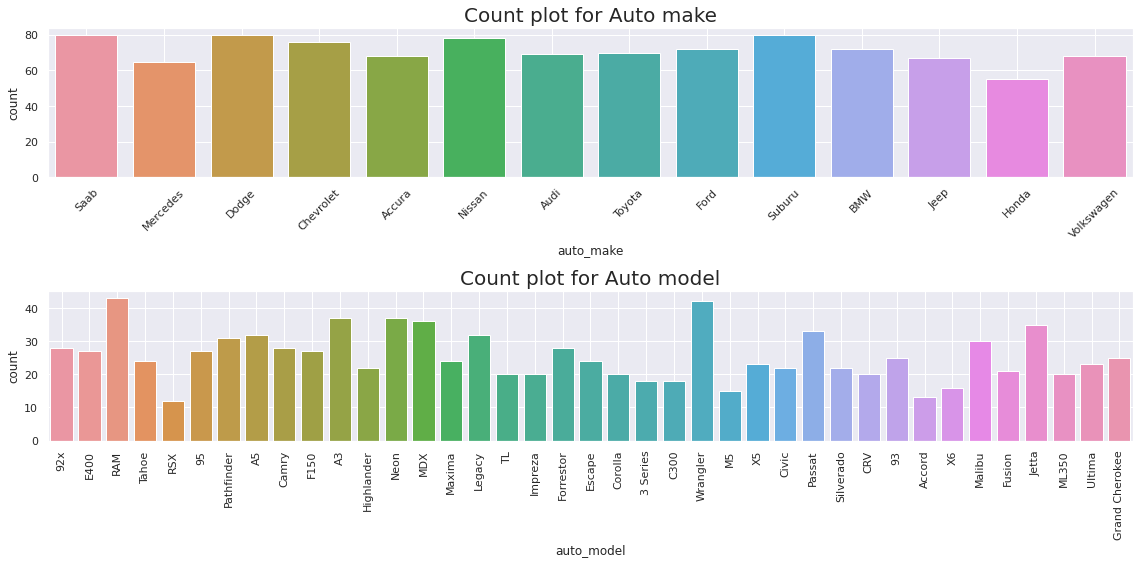

In [55]:
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title("Count plot for Auto make",fontsize=20)
sns.countplot('auto_make',data=df)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.subplot(2,1,2)
plt.title("Count plot for Auto model",fontsize=20)
sns.countplot('auto_model',data=df)
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
a['auto_make'].value_counts()

Mercedes      22
Ford          22
Chevrolet     21
Audi          21
Dodge         20
BMW           20
Suburu        19
Volkswagen    19
Saab          18
Honda         14
Nissan        14
Accura        13
Toyota        13
Jeep          11
Name: auto_make, dtype: int64

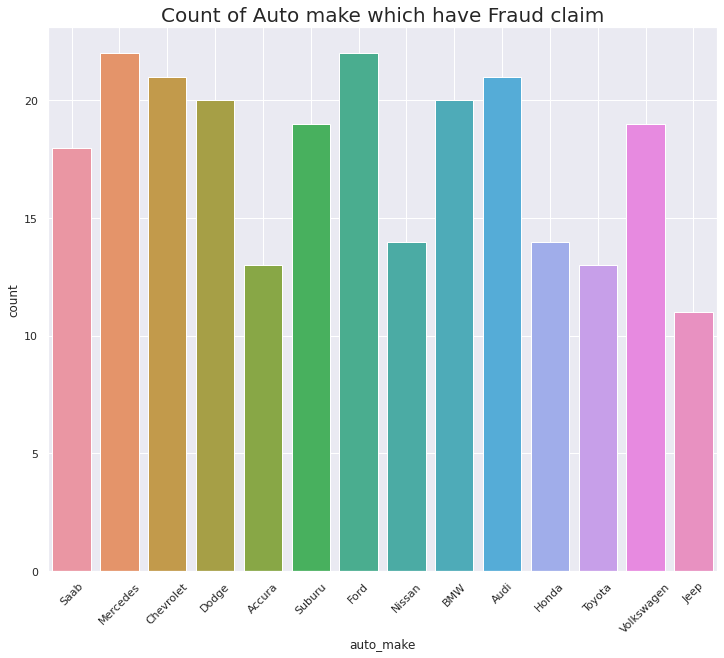

In [57]:
plt.figure(figsize=(12,10))
sns.countplot('auto_make',data=a)
plt.title("Count of Auto make which have Fraud claim",fontsize=20)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



Auto make of the company's Mercedes, Ford, Audi are having highest fraud claims.Chevrolet, Dodge, BMW are as wellhave the fraud claims.


In [58]:
pd.pivot_table(a,values=['vehicle_claim'],index=['auto_make','auto_model','policy_number']).sort_values('vehicle_claim',ascending=False)[:20]

vehicle_claim
auto_make auto_model policy_number               
Suburu    Impreza    217938                 77760
Accura    TL         515050                 76400
Chevrolet Tahoe      291006                 75600
Dodge     Neon       346940                 75530
          RAM        115399                 73620
Honda     Accord     127754                 71520
Toyota    Highlander 209177                 69210
Chevrolet Tahoe      187775                 68310
Ford      Escape     626208                 67590
Mercedes  E400       728025                 67440
          ML350      753844                 66570
BMW       X6         752504                 66560
          X5         616337                 64720
Mercedes  C300       442795                 64480
BMW       X6         730819                 63920
Mercedes  C300       991553                 63280
Suburu    Legacy     691115                 62640
Audi      A5         356590                 62100
Jeep      Wrangler   951863                 61760
Dodge     Neon       332867                 61740



Person having Policy number - 217938 on the vehicle - Suburu-Impreza has claimed an amount of $77760 which is identified as fraud.


In [59]:
a['bodily_injuries'].value_counts()

2    90
0    80
1    77
Name: bodily_injuries, dtype: int64

In [60]:
df['umbrella_limit']=df['umbrella_limit'].replace(-1000000,0)

In [61]:
df2=df

In [62]:
df2=df2.drop(['policy_number','policy_bind_date','insured_zip','incident_date','authorities_contacted','profit','auto_make','auto_model'],axis=1)

In [63]:
df2.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'incident_state', 'incident_city', 'incident_location',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_year', 'fraud_reported'],
      dtype='object')

In [64]:
df2=pd.get_dummies(df2,columns=['policy_state','policy_csl','insured_sex','insured_education_level','insured_occupation',
                                'insured_hobbies','insured_relationship','incident_type','collision_type','incident_severity','incident_state',
                                'incident_city','incident_location','property_damage','police_report_available'],drop_first=True)

In [65]:
df2.shape

(1000, 1086)

In [66]:
df2.columns

Index(['months_as_customer', 'age', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'capital-gains',
       'capital-loss', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'bodily_injuries',
       ...
       'incident_location_9910 Maple Ave',
       'incident_location_9911 Britain Lane',
       'incident_location_9918 Andromedia Drive',
       'incident_location_9929 Rock Drive', 'incident_location_9935 4th Drive',
       'incident_location_9942 Tree Ave', 'incident_location_9980 Lincoln Ave',
       'incident_location_9988 Rock Ridge', 'property_damage_YES',
       'police_report_available_YES'],
      dtype='object', length=1086)

In [67]:
x=df2.drop(['fraud_reported'],axis=1)

In [68]:
y=df2['fraud_reported']

In [69]:
from imblearn.over_sampling import SMOTE

x_upsample, y_upsample  = SMOTE().fit_resample(x, y)

print(x_upsample.shape)
print(y_upsample.shape)

(1506, 1085)
(1506,)


In [70]:
y_upsample.value_counts()

Y    753
N    753
Name: fraud_reported, dtype: int64

In [71]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [72]:
x_scale=sc.fit_transform(x_upsample)

In [73]:
from sklearn.decomposition import PCA
pca=PCA(n_components=0.95)
x_scaled=pca.fit_transform(x_scale)

In [74]:
r=pca.explained_variance_ratio_

In [75]:
np.sum(r)

0.9504497855398818

In [76]:
len(r)

950



1039 features are converted into 944 principal components which constitutes 95.02% variance.

The explained variance tells how much information (variance) can be attributed to each of the principal components


In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y_upsample,test_size=0.3)

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rf=RandomForestClassifier()

In [80]:
#Hyperparamenter tuning
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini','entropy'], 'max_depth': np.arange(1,30)}

In [81]:
grid=GridSearchCV(rf,parameters)

In [82]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [83]:
model=grid.best_estimator_

In [84]:
grid.best_score_

0.8387226359738207

In [85]:
y_pred=model.predict(x_test)

In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.831858407079646

<AxesSubplot:>

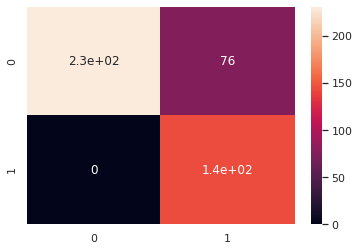

In [87]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_pred,y_test)
sns.heatmap(cm,annot=True)

In [88]:
clf=classification_report(y_pred,y_test)
print(clf)

              precision    recall  f1-score   support

           N       1.00      0.75      0.86       307
           Y       0.66      1.00      0.79       145

    accuracy                           0.83       452
   macro avg       0.83      0.88      0.83       452
weighted avg       0.89      0.83      0.84       452



In [89]:
from sklearn.model_selection import cross_val_score
cross_val=cross_val_score(model,x_train,y_train,cv=10)

In [90]:
print(cross_val)

[0.80188679 0.83018868 0.85849057 0.8490566  0.83809524 0.86666667
 0.84761905 0.79047619 0.84761905 0.85714286]


In [91]:
print("Acccuracy of the model is :", np.mean(cross_val))

Acccuracy of the model is : 0.8387241689128482


### MODEL SAVING

In [92]:
import joblib
joblib.dump(model,'InsuranceClaimFraudDetection.pkl')

['InsuranceClaimFraudDetection.pkl']